In [66]:
import pandas as pd  

df1 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data1.csv')
df2 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data2.csv')
df3 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data3.csv')

print("Dataset 1:\n", df1.head(), "\n")
print("Dataset 2:\n", df2.head(), "\n")
print("Dataset 3:\n", df3.head(), "\n")

print("Columns in Dataset 1:", df1.columns)
print("Columns in Dataset 2:", df2.columns)
print("Columns in Dataset 3:", df3.columns)

print("Missing values in Dataset 1:\n", df1.isnull().sum())
print("Missing values in Dataset 2:\n", df2.isnull().sum())
print("Missing values in Dataset 3:\n", df3.isnull().sum())


Dataset 1:
      Unnamed: 0  DeadatFollowUp    OS  NewTumorEvent    TTP  Progressed  \
0  TCGA-09-0364            True   887           True  395.0        True   
1  TCGA-09-0367            True   547          False  547.0        True   
2  TCGA-09-1659            True   304          False  304.0        True   
3  TCGA-09-1667           False  2500           True  460.0        True   
4  TCGA-09-1669           False   928          False  928.0       False   

     PFS  Age ResidDisease       Stage  
0  395.0   80       > 1 cm   Stage IIC  
1  547.0   67       < 1 cm  Stage IIIC  
2  304.0   51       > 1 cm  Stage IIIC  
3  460.0   61          NaN   Stage IIC  
4  928.0   54          NaN  Stage IIIA   

Dataset 2:
                                 case_id project__project_id     submitter_id  \
0  01a4c099-aaf9-4427-8f7c-657fe076ee2e             CMI-MBC  MBCProject_0399   
1  0306ae60-c338-47dd-92f0-f8981a0fadf3             CMI-MBC  MBCProject_3896   
2  053a1c7a-6eb2-4c12-b31d-671dad7104

In [67]:
import pandas as pd

# Load datasets again
df1 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data1.csv')
df2 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data2.csv')
df3 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data3.csv')

# 🟢 Step 1: Rename Columns for Consistency
df1.rename(columns={'Unnamed: 0': 'Patient_ID', 'OS': 'Overall_Survival', 
                    'TTP': 'Time_to_Progression', 'Stage': 'Cancer_Stage'}, inplace=True)

df2.rename(columns={'case_id': 'Patient_ID', 
                    'diagnoses__tissue_or_organ_of_origin': 'Cancer_Type', 
                    'diagnoses__age_at_diagnosis': 'Age_at_Diagnosis'}, inplace=True)

# Assuming '6.044' is the 'Survival_Time' column and 'brca_metabric' is 'Patient_ID'
df3.rename(columns={'brca_metabric': 'Patient_ID', '6.044': 'Survival_Time'}, inplace=True)

# 🟢 Step 2: Handle Missing Values
df1.fillna({'ResidDisease': 'Unknown'}, inplace=True)
df2.fillna({'Cancer_Type': 'Unknown', 'Age_at_Diagnosis': df2['Age_at_Diagnosis'].median()}, inplace=True)
df3.fillna({'Survival_Time': df3['Survival_Time'].median()}, inplace=True)

# 🟢 Step 3: Convert Data Types
df1['Age'] = df1['Age'].astype(int)
df2['Age_at_Diagnosis'] = (df2['Age_at_Diagnosis'] / 365).astype(int)  # Convert days to years
df3['Survival_Time'] = df3['Survival_Time'].astype(int)

# 🟢 Step 4: Merge Datasets on Patient_ID
merged_df = df1.merge(df2, on='Patient_ID', how='outer').merge(df3, on='Patient_ID', how='outer')

# Save the cleaned dataset
merged_df.to_csv('cleaned_cancer_data.csv', index=False)

# 🟢 Step 5: Display Summary
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              2801 non-null   object 
 1   DeadatFollowUp                          93 non-null     object 
 2   Overall_Survival                        93 non-null     float64
 3   NewTumorEvent                           93 non-null     object 
 4   Time_to_Progression                     91 non-null     float64
 5   Progressed                              93 non-null     object 
 6   PFS                                     91 non-null     float64
 7   Age                                     93 non-null     float64
 8   ResidDisease                            93 non-null     object 
 9   Cancer_Stage                            93 non-null     object 
 10  project__project_id                     200 non-null    obje

In [68]:
import pandas as pd

# Load datasets again
df1 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data1.csv')
df2 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data2.csv')
df3 = pd.read_csv('C:\\Users\\AKHIL\\Documents\\Women Cancer Relapse Project\\Clinical-data3.csv')

# 🟢 Step 1: Rename Columns for Consistency
df1.rename(columns={'Unnamed: 0': 'Patient_ID', 'OS': 'Overall_Survival', 
                    'TTP': 'Time_to_Progression', 'Stage': 'Cancer_Stage'}, inplace=True)

df2.rename(columns={'case_id': 'Patient_ID', 
                    'diagnoses__tissue_or_organ_of_origin': 'Cancer_Type', 
                    'diagnoses__age_at_diagnosis': 'Age_at_Diagnosis'}, inplace=True)

# Rename columns in df3
df3.rename(columns={'brca_metabric': 'Patient_ID', '6.044': 'Survival_Time'}, inplace=True)

# 🟢 Step 2: Handle Missing Values
df1.fillna({'ResidDisease': 'Unknown'}, inplace=True)
df2.fillna({'Cancer_Type': 'Unknown', 'Age_at_Diagnosis': df2['Age_at_Diagnosis'].median()}, inplace=True)
df3.fillna({'Survival_Time': df3['Survival_Time'].median()}, inplace=True)

# 🟢 Step 3: Convert Data Types
df1['Age'] = df1['Age'].astype(int)
df2['Age_at_Diagnosis'] = (df2['Age_at_Diagnosis'] / 365).astype(int)  # Convert days to years
df3['Survival_Time'] = df3['Survival_Time'].astype(int)

# 🟢 Step 4: Merge Datasets on Patient_ID
merged_df = df1.merge(df2, on='Patient_ID', how='outer').merge(df3, on='Patient_ID', how='outer')

# Verify column names in merged_df
print("Merged DataFrame columns:", merged_df.columns)

# 🟢 Step 5: Handle Missing Values in Merged DataFrame
# Drop columns with more than 50% missing values
threshold = len(merged_df) * 0.5
merged_df.dropna(thresh=threshold, axis=1, inplace=True)

# Fill missing values with suitable measures (mean, median, etc.)
if 'Survival_Time' in merged_df.columns:
    merged_df['Survival_Time'].fillna(merged_df['Survival_Time'].median(), inplace=True)
if 'Age' in merged_df.columns:
    merged_df['Age'].fillna(merged_df['Age'].median(), inplace=True)
if 'Age_at_Diagnosis' in merged_df.columns:
    merged_df['Age_at_Diagnosis'].fillna(merged_df['Age_at_Diagnosis'].median(), inplace=True)

# Drop rows with any remaining missing values
merged_df.dropna(inplace=True)

# Save the cleaned dataset again
merged_df.to_csv('cleaned_cancer_data_final.csv', index=False)

# Display summary statistics
print(merged_df.describe())


Merged DataFrame columns: Index(['Patient_ID', 'DeadatFollowUp', 'Overall_Survival', 'NewTumorEvent',
       'Time_to_Progression', 'Progressed', 'PFS', 'Age', 'ResidDisease',
       'Cancer_Stage', 'project__project_id', 'submitter_id', 'Cancer_Type',
       'Age_at_Diagnosis', 'diagnoses__primary_diagnosis',
       'diagnoses__morphology', 'diagnoses__updated_datetime',
       'diagnoses__diagnosis_id', 'diagnoses__submitter_id',
       'diagnoses__site_of_resection_or_biopsy', 'diagnoses__state',
       'diagnoses__created_datetime', 'demographic__demographic_id',
       'demographic__ethnicity', 'demographic__gender', 'demographic__race',
       'demographic__vital_status', 'demographic__updated_datetime',
       'demographic__submitter_id', 'demographic__state',
       'demographic__created_datetime', 'MB-0000', 'MB-0000.1', '75.65',
       'MASTECTOMY', 'Breast Cancer', 'Breast Invasive Ductal Carcinoma', 'NA',
       'NO', 'claudin-low', '1', 'Positve', 'Positive', '3', 'NEUTRAL

C:\Users\AKHIL\AppData\Local\Temp\ipykernel_20096\3480622082.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Survival_Time'].fillna(merged_df['Survival_Time'].median(), inplace=True)


In [69]:
columns_to_keep = [
    'Patient_ID',       # Unique patient identifier
    'Survival_Time',    # Time until survival event
    'IDC',              # Likely related to Invasive Ductal Carcinoma
    'Primary',          # Indicates primary cancer
    'Female',           # Gender
    'ER-/HER2-',        # Estrogen receptor & HER2 status
    'MASTECTOMY',       # Whether patient had mastectomy
    'Breast Cancer',    # Type of cancer
    'Breast Invasive Ductal Carcinoma',  # More specific cancer type
    'Living'            # Vital status
]


In [70]:
df_filtered = merged_df[columns_to_keep].drop_duplicates()
print(df_filtered.head())

        Patient_ID  Survival_Time   IDC  Primary  Female  \
241  brca_metabric            4.0   IDC  Primary  Female   
244  brca_metabric            6.0  MDLC  Primary  Female   
245  brca_metabric            4.0   IDC  Primary  Female   
250  brca_metabric            5.0   IDC  Primary  Female   
251  brca_metabric            3.0   ILC  Primary  Female   

                 ER-/HER2-         MASTECTOMY  Breast Cancer  \
241  ER+/HER2- High Prolif  BREAST CONSERVING  Breast Cancer   
244  ER+/HER2- High Prolif         MASTECTOMY  Breast Cancer   
245  ER+/HER2- High Prolif         MASTECTOMY  Breast Cancer   
250  ER+/HER2- High Prolif  BREAST CONSERVING  Breast Cancer   
251  ER+/HER2- High Prolif         MASTECTOMY  Breast Cancer   

              Breast Invasive Ductal Carcinoma                Living  
241           Breast Invasive Ductal Carcinoma                Living  
244  Breast Mixed Ductal and Lobular Carcinoma       Died of Disease  
245           Breast Invasive Ductal Carc

In [71]:
print(df_filtered.isnull().sum())


Patient_ID                          0
Survival_Time                       0
IDC                                 0
Primary                             0
Female                              0
ER-/HER2-                           0
MASTECTOMY                          0
Breast Cancer                       0
Breast Invasive Ductal Carcinoma    0
Living                              0
dtype: int64


In [72]:
df_filtered['Survival_Time'] = df_filtered['Survival_Time'].astype(float)
df_filtered['IDC'] = df_filtered['IDC'].astype(str)
df_filtered['Primary'] = df_filtered['Primary'].astype(str)
df_filtered['Living'] = df_filtered['Living'].astype(str)


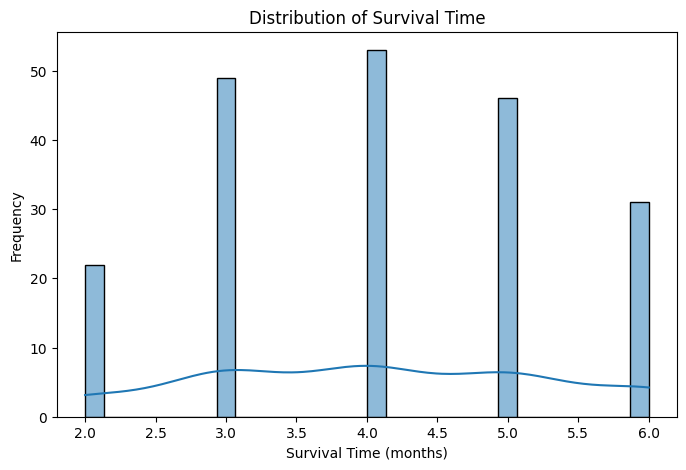

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_filtered['Survival_Time'], bins=30, kde=True)
plt.title("Distribution of Survival Time")
plt.xlabel("Survival Time (months)")
plt.ylabel("Frequency")
plt.show()

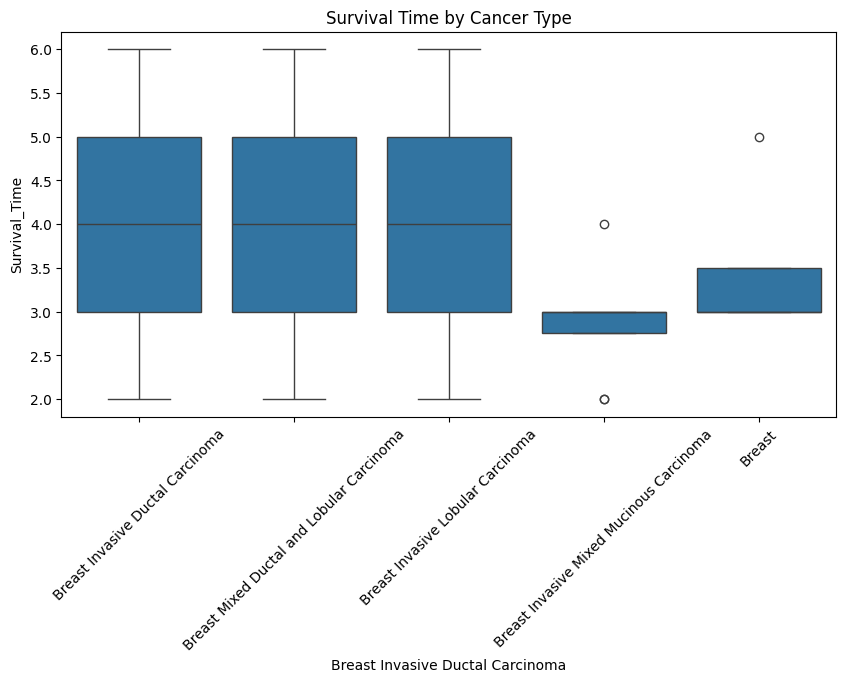

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_filtered['Breast Invasive Ductal Carcinoma'], y=df_filtered['Survival_Time'])
plt.xticks(rotation=45)
plt.title("Survival Time by Cancer Type")
plt.show()

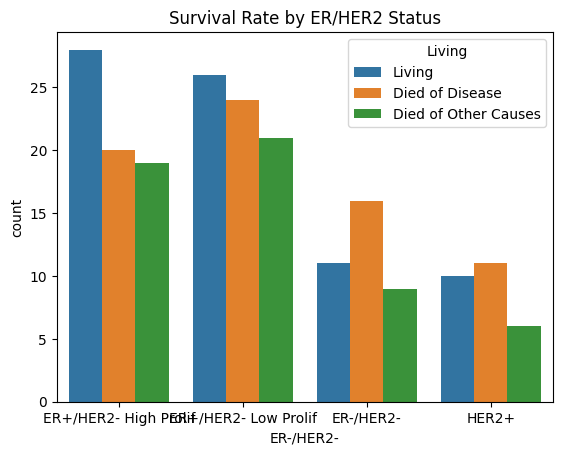

In [75]:
sns.countplot(x=df_filtered['ER-/HER2-'], hue=df_filtered['Living'])
plt.title("Survival Rate by ER/HER2 Status")
plt.show()

In [76]:
df_filtered = pd.get_dummies(df_filtered, columns=['IDC', 'Primary', 'ER-/HER2-', 'MASTECTOMY', 'Breast Invasive Ductal Carcinoma'])
df_filtered['Living'] = df_filtered['Living'].apply(lambda x: 1 if x == 'Living' else 0)

In [77]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['Survival_Time'])  # Features
y = df_filtered['Survival_Time']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Non-Numeric Columns: Index(['Patient_ID', 'Female', 'Breast Cancer'], dtype='object')


In [79]:
X_train = X_train.drop(columns=['Patient_ID'])
X_test = X_test.drop(columns=['Patient_ID'])


In [80]:
X_train['Female'] = X_train['Female'].map({'Male': 0, 'Female': 1})
X_test['Female'] = X_test['Female'].map({'Male': 0, 'Female': 1})

In [81]:
X_train = pd.get_dummies(X_train, columns=['Breast Cancer'])
X_test = pd.get_dummies(X_test, columns=['Breast Cancer'])

# Ensure both training and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [82]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.235141980986493


In [85]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.235141980986493


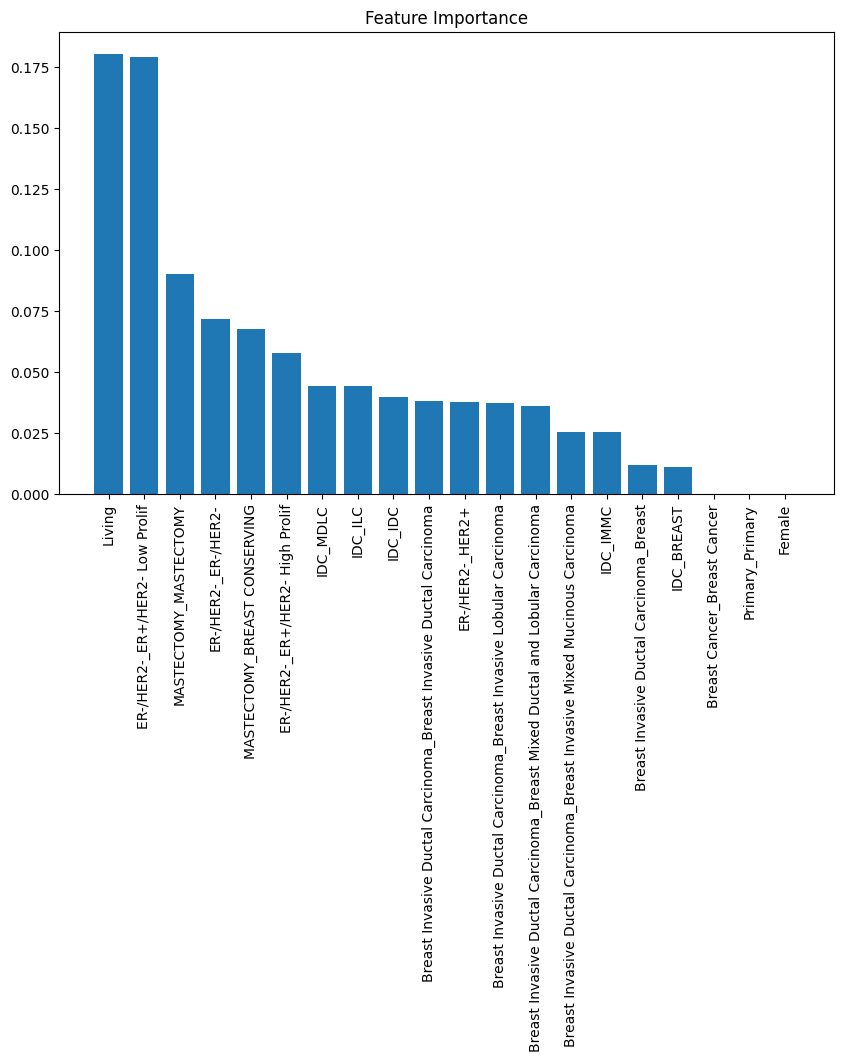

In [86]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
feature_names = X_train.columns

indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.show()


In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"New MAE: {mae}")

New MAE: 1.2176625734804964


In [89]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

ensemble = VotingRegressor([('rf', rf), ('gb', gb), ('xgb', xgb)])
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Ensemble MAE: {mae}")

Ensemble MAE: 1.2293091878764033


In [90]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stack = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    final_estimator=Ridge()  # Meta-model to learn best combination
)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Stacking MAE: {mae}")

Stacking MAE: 1.0316063132979714


In [91]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Meta model
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error
stacking_mae = mean_absolute_error(y_test, y_pred_stack)
print("Stacking MAE:", stacking_mae)


Stacking MAE: 1.0331395343426615


In [92]:
best_model = stacking_model.estimators_[0]  # Change index if needed
importances = best_model.feature_importances_


In [93]:
importances = stacking_model.estimators_[1].feature_importances_

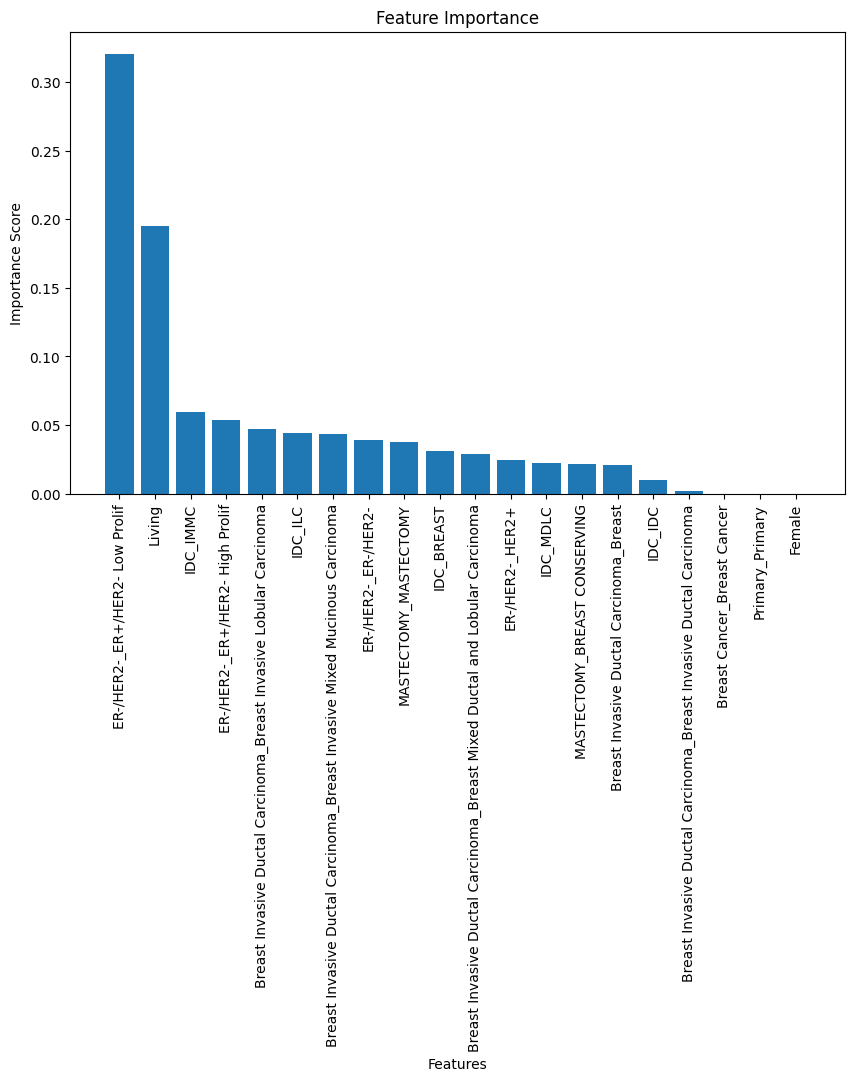

In [94]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [95]:
# Selecting important features
important_features = [
    "ER-/HER2-_ER+/HER2- Low Prolif",
    "Living",
    "IDC_IMMC",
    "ER-/HER2-_ER+/HER2- High Prolif",
    "Breast Invasive Ductal Carcinoma_Breast Invasive Lobular Carcinoma",
    "IDC_ILC",
    "IDC_MDLC",
    "MASTECTOMY_MASTECTOMY"
]

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [96]:
# Retraining the Stacking Model with Selected Features
stacking_model.fit(X_train_selected, y_train)
y_pred_stack_selected = stacking_model.predict(X_test_selected)

# Evaluate
stacking_mae_selected = mean_absolute_error(y_test, y_pred_stack_selected)
print("Stacking MAE (Selected Features):", stacking_mae_selected)

Stacking MAE (Selected Features): 1.0200504670780273


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Use GridSearchCV on the final estimator (meta-model)
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Update Stacking Model with Best Meta-Model
best_meta_model = GradientBoostingRegressor(**grid_search.best_params_)

stacking_model.final_estimator_ = best_meta_model
stacking_model.fit(X_train_selected, y_train)

# Evaluate again
y_pred_stack_best = stacking_model.predict(X_test_selected)
stacking_mae_best = mean_absolute_error(y_test, y_pred_stack_best)

print("Stacking MAE (Optimized):", stacking_mae_best)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Stacking MAE (Optimized): 1.0200504670780273


In [98]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=3, random_state=42)),
]

# Define XGBoost as the meta-model
meta_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

# Create stacking model
stacking_model_xgb = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = stacking_model_xgb.predict(X_test)

# Calculate MAE
from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"Stacking MAE with XGBoost: {mae_xgb:.4f}")

Stacking MAE with XGBoost: 1.0918


In [99]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10]
}

# Randomized search
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, 
                                   n_iter=10, cv=5, scoring='neg_mean_absolute_error', 
                                   verbose=1, random_state=42, n_jobs=-1)

# Fit model
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Predictions & MAE
y_pred = best_xgb.predict(X_test)
mae_xgb_optimized = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Optimized XGBoost MAE:", mae_xgb_optimized)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.001}
Optimized XGBoost MAE: 1.032946865733077


In [100]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]

# Stacking model with Ridge as meta-model
stacking_model_ridge = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=1.0), cv=5)

# Train the stacking model
stacking_model_ridge.fit(X_train, y_train)

# Predictions & MAE
y_pred = stacking_model_ridge.predict(X_test)
mae_stacking_ridge = mean_absolute_error(y_test, y_pred)

print("Stacking MAE (Ridge Final Estimator):", mae_stacking_ridge)

Stacking MAE (Ridge Final Estimator): 1.0167664776110281


In [101]:
from lightgbm import LGBMRegressor

# Stacking model with LightGBM as meta-model
stacking_model_lgbm = StackingRegressor(estimators=base_models, final_estimator=LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42), cv=5)

# Train the model
stacking_model_lgbm.fit(X_train, y_train)

# Predictions & MAE
y_pred = stacking_model_lgbm.predict(X_test)
mae_stacking_lgbm = mean_absolute_error(y_test, y_pred)

print("Stacking MAE (LightGBM Final Estimator):", mae_stacking_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 2
[LightGBM] [Info] Start training from score 4.131250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [102]:
from sklearn.model_selection import cross_val_score

cv_mae = -cross_val_score(stacking_model_lgbm, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE Scores:", cv_mae)
print("Mean CV MAE:", cv_mae.mean())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 2
[LightGBM] [Info] Start training from score 4.234375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 2
[LightGBM] [Info] Start training from score 4.085938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 2
[LightGBM] [Info] Start training from score 4.187500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 2
[LightGBM] [Info] Start training from score 4.093750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 128, number of used features: 2
[LightGBM] [Info] Start training from score 4.054688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [105]:
import shap

# Check the model inside StackingRegressor
print(stacking_model.final_estimator_)

# Use the correct model for SHAP
explainer = shap.Explainer(stacking_model.final_estimator_, X_train_selected)
shap_values = explainer(X_test_selected)

# Visualize feature importance
shap.summary_plot(shap_values, X_test_selected)


Ridge()


ValueError: shapes (2,) and (8,) not aligned: 2 (dim 0) != 8 (dim 0)

In [106]:
explainer = shap.Explainer(lightgbm_model, X_train_selected)  # Change this to your actual model variable
shap_values = explainer(X_test_selected)
shap.summary_plot(shap_values, X_test_selected)


NameError: name 'lightgbm_model' is not defined

In [107]:
print(stacking_model.final_estimator_)


Ridge()


In [ ]:
%whos


Variable              Type         Data/Info
--------------------------------------------
X                     DataFrame             Patient_ID  Fema<...>\n[201 rows x 21 columns]
X_test                DataFrame          Female  Living  IDC<...>                   True  
X_train               DataFrame          Female  Living  IDC<...>\n[160 rows x 20 columns]
breast_cancer_col     str          Breast Cancer_Breast Cancer
columns_to_keep       list         n=10
df1                   DataFrame          Patient_ID  DeadatF<...>n\n[93 rows x 10 columns]
df2                   DataFrame                             <...>\n[200 rows x 22 columns]
df3                   DataFrame             Patient_ID    MB<...>n[2508 rows x 39 columns]
df_filtered           DataFrame             Patient_ID  Surv<...>\n[201 rows x 22 columns]
merged_df             DataFrame             Patient_ID  MB-0<...>n[1092 rows x 39 columns]
non_numeric_columns   Index        Index(['Patient_ID', 'Fem<...>Cancer'], dtyp

In [109]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Train RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [110]:
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb

# Define base models
base_models = [
    ('xgb', xgb_model),  
    ('rf', rf_model)    
]

# Define Stacking Regressor with LightGBM as final estimator
stacking_model_lgbm = StackingRegressor(
    estimators=base_models, 
    final_estimator=lgb.LGBMRegressor()
)

# Train Stacking Model
stacking_model_lgbm.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 2
[LightGBM] [Info] Start training from score 4.131250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=LGBMRegressor())

In [114]:
import shap

# Extract the final estimator (LightGBM)
final_model = stacking_model_lgbm.final_estimator_

# Create SHAP explainer using TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)


LightGBMError: The number of features in data (20) is not the same as it was in training data (2).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [115]:
# Check feature mismatch
print("Training Features:", X_train.columns)
print("Testing Features:", X_test.columns)

# Ensure SHAP receives the correct feature set
X_test_fixed = X_test[X_train.columns]  # Select only the columns used for training

# Now, proceed with SHAP analysis
import shap

# Extract final LightGBM model
final_model = stacking_model_lgbm.final_estimator_

# Create SHAP explainer
explainer = shap.TreeExplainer(final_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_fixed)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_fixed)

Training Features: Index(['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC',
       'IDC_MDLC', 'Primary_Primary', 'ER-/HER2-_ER+/HER2- High Prolif',
       'ER-/HER2-_ER+/HER2- Low Prolif', 'ER-/HER2-_ER-/HER2-',
       'ER-/HER2-_HER2+', 'MASTECTOMY_BREAST CONSERVING',
       'MASTECTOMY_MASTECTOMY', 'Breast Invasive Ductal Carcinoma_Breast',
       'Breast Invasive Ductal Carcinoma_Breast Invasive Ductal Carcinoma',
       'Breast Invasive Ductal Carcinoma_Breast Invasive Lobular Carcinoma',
       'Breast Invasive Ductal Carcinoma_Breast Invasive Mixed Mucinous Carcinoma',
       'Breast Invasive Ductal Carcinoma_Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Cancer_Breast Cancer'],
      dtype='object')
Testing Features: Index(['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC',
       'IDC_MDLC', 'Primary_Primary', 'ER-/HER2-_ER+/HER2- High Prolif',
       'ER-/HER2-_ER+/HER2- Low Prolif', 'ER-/HER2-_ER-/HER2-',
       'ER-/HER2-_HER2+

LightGBMError: The number of features in data (20) is not the same as it was in training data (2).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [116]:
print("LightGBM trained with:", final_model.n_features_in_)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

LightGBM trained with: 2
X_train shape: (160, 20)
X_test shape: (41, 20)


In [117]:
trained_feature_names = X_train.columns[:final_model.n_features_in_]  # Get the first N features LightGBM trained on
X_test_fixed = X_test[trained_feature_names]  # Ensure the same feature set is used

In [118]:
trained_features = final_model.feature_name_  # Get names of features used in training
print("LightGBM was trained on these features:", trained_features)


LightGBM was trained on these features: ['Column_0', 'Column_1']


In [119]:
final_model.fit(X_train, y_train)  # Ensure all 20 features are used


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 12
[LightGBM] [Info] Start training from score 4.131250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor()

In [120]:
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")

In [121]:
X_test = X_test[X_train.columns]  # Keep only training features


In [122]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Features used for training:", X_train.columns.tolist())


X_train shape: (160, 20)
X_test shape: (41, 20)
Features used for training: ['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC', 'IDC_MDLC', 'Primary_Primary', 'ER-/HER2-_ER+/HER2-_High_Prolif', 'ER-/HER2-_ER+/HER2-_Low_Prolif', 'ER-/HER2-_ER-/HER2-', 'ER-/HER2-_HER2+', 'MASTECTOMY_BREAST_CONSERVING', 'MASTECTOMY_MASTECTOMY', 'Breast_Invasive_Ductal_Carcinoma_Breast', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Ductal_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Lobular_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Mixed_Mucinous_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Mixed_Ductal_and_Lobular_Carcinoma', 'Breast_Cancer_Breast_Cancer']


In [126]:
print("Fixed X_test shape:", X_test_fixed.shape)
print("Fixed X_test columns:", X_test_fixed.columns.tolist())


Fixed X_test shape: (41, 20)
Fixed X_test columns: ['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC', 'IDC_MDLC', 'Primary_Primary', 'ER-/HER2-_ER+/HER2-_High_Prolif', 'ER-/HER2-_ER+/HER2-_Low_Prolif', 'ER-/HER2-_ER-/HER2-', 'ER-/HER2-_HER2+', 'MASTECTOMY_BREAST_CONSERVING', 'MASTECTOMY_MASTECTOMY', 'Breast_Invasive_Ductal_Carcinoma_Breast', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Ductal_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Lobular_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Mixed_Mucinous_Carcinoma', 'Breast_Invasive_Ductal_Carcinoma_Breast_Mixed_Ductal_and_Lobular_Carcinoma', 'Breast_Cancer_Breast_Cancer']


In [125]:
X_test_fixed = X_test[final_model.feature_name_]  # Select only the model's training features


C:\Users\AKHIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


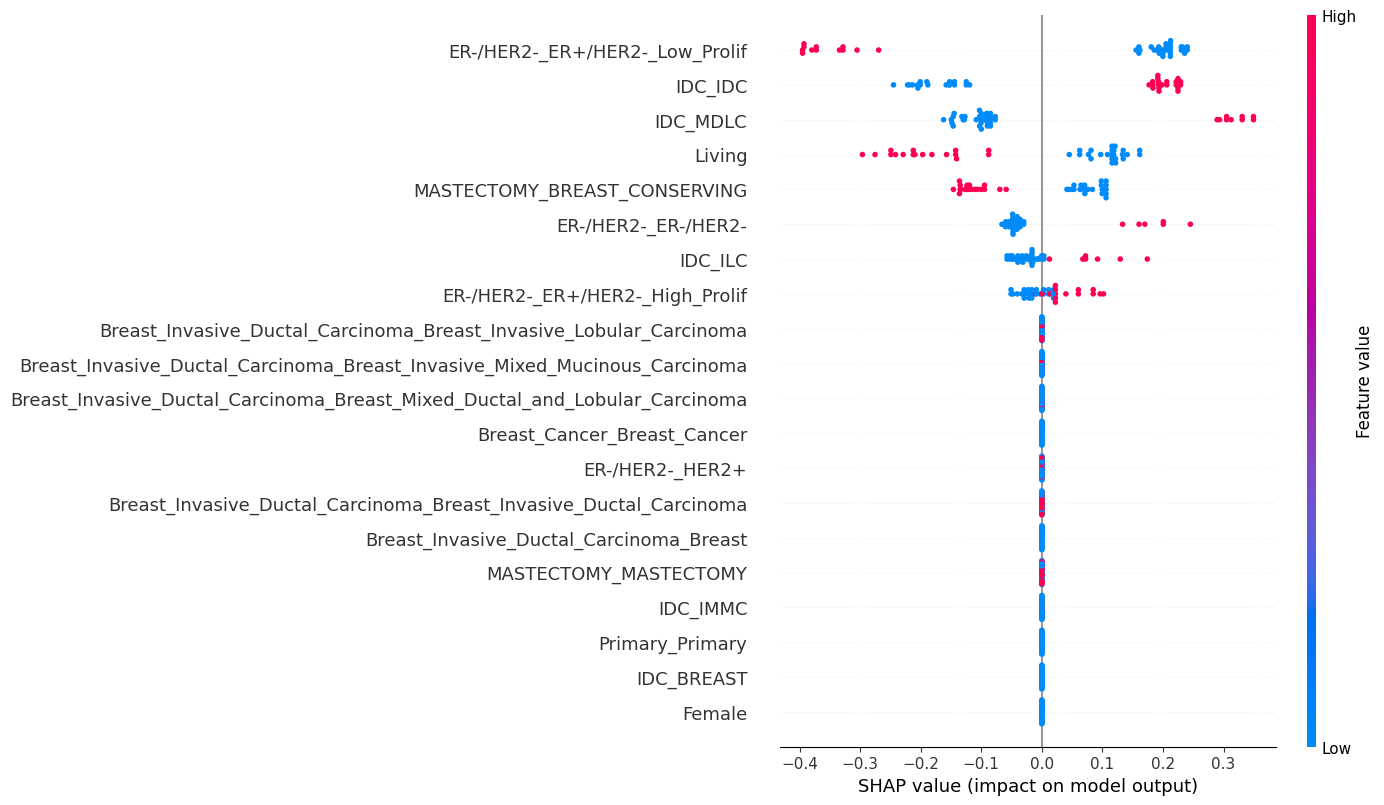

In [127]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_fixed)
shap.summary_plot(shap_values, X_test_fixed)


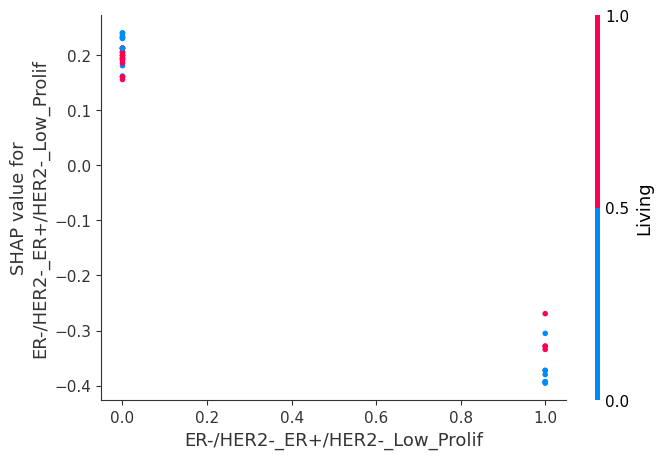

In [128]:
shap.dependence_plot("ER-/HER2-_ER+/HER2-_Low_Prolif", shap_values, X_test_fixed)

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = final_model.predict(X_test_fixed)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 1.1562996406930672
MSE: 1.7993453131464523


In [130]:
import pandas as pd
feature_importance = pd.Series(final_model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

MASTECTOMY_BREAST_CONSERVING                                                  85
Living                                                                        84
IDC_IDC                                                                       72
ER-/HER2-_ER+/HER2-_Low_Prolif                                                68
IDC_MDLC                                                                      63
IDC_ILC                                                                       49
ER-/HER2-_ER+/HER2-_High_Prolif                                               23
ER-/HER2-_ER-/HER2-                                                           20
IDC_BREAST                                                                     0
Female                                                                         0
Primary_Primary                                                                0
IDC_IMMC                                                                       0
ER-/HER2-_HER2+             

In [131]:
low_importance_features = [
    'IDC_BREAST', 'Female', 'Primary_Primary', 'IDC_IMMC', 'ER-/HER2-_HER2+',
    'MASTECTOMY_MASTECTOMY', 'Breast_Invasive_Ductal_Carcinoma_Breast',
    'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Ductal_Carcinoma',
    'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Lobular_Carcinoma',
    'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Mixed_Mucinous_Carcinoma',
    'Breast_Invasive_Ductal_Carcinoma_Breast_Mixed_Ductal_and_Lobular_Carcinoma',
    'Breast_Cancer_Breast_Cancer'
]

X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

In [132]:
final_model.fit(X_train_filtered, y_train)
y_pred = final_model.predict(X_test_filtered)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("New MAE:", mean_absolute_error(y_test, y_pred))
print("New MSE:", mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 8
[LightGBM] [Info] Start training from score 4.131250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [133]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Optimized XGBoost Model:")
print("Best Hyperparameters:", grid_search.best_params_)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Optimized XGBoost Model:
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
MAE: 1.0704
MSE: 1.6565


In [134]:
import joblib

# Save the trained model
joblib.dump(best_xgb, "final_xgb_model.pkl")

print("Model saved as final_xgb_model.pkl")

Model saved as final_xgb_model.pkl


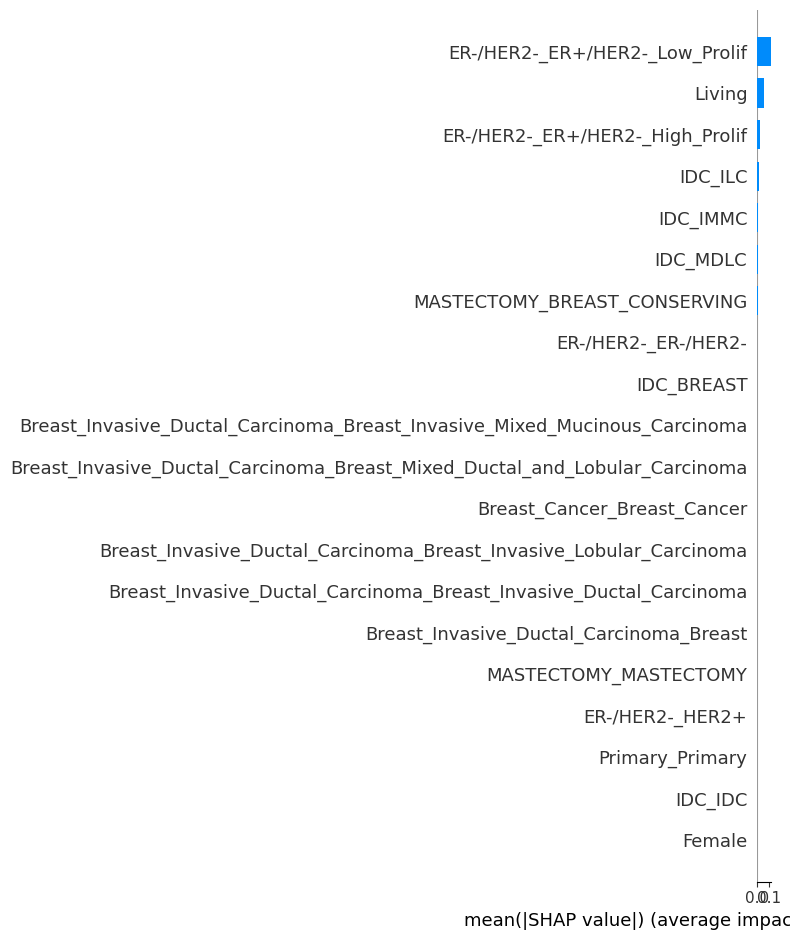

In [135]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")  # Feature importance plot

In [136]:
import joblib
model = joblib.load("final_xgb_model.pkl")
print("Model Loaded Successfully!")


Model Loaded Successfully!


In [138]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mae = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

print(f"Cross-Validation MAE: {-cv_mae.mean():.4f}")
print(f"Cross-Validation MSE: {-cv_mse.mean():.4f}")

Cross-Validation MAE: 1.0418
Cross-Validation MSE: 1.5207


In [139]:
y_final_pred = model.predict(X_test)  # Replace with actual test data

print("Final Predictions:", y_final_pred)

Final Predictions: [4.1342044 4.214243  4.1342044 4.011233  4.011233  4.011233  4.1342044
 4.207607  3.9549315 4.309624  4.332893  3.9549315 4.3519135 4.332893
 4.0392327 4.3519135 4.332893  4.0392327 4.309624  4.214243  4.214243
 3.9569142 3.9549315 3.9569142 4.214243  4.214243  4.1275682 4.3452773
 4.309624  4.1342044 3.9569142 4.214243  4.0392327 3.928914  4.309624
 4.011233  4.332893  4.205999  4.324649  4.309624  4.011233 ]


In [140]:
import joblib
joblib.dump(model, "cancer_risk_model.pkl")

['cancer_risk_model.pkl']

In [141]:
import os
print(os.path.exists("your_model_path.json"))


False


In [146]:
import xgboost as xgb

# Define feature names
feature_names = ['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC', 'IDC_MDLC', 
                 'Primary_Primary', 'ER-/HER2-_ER+/HER2-_High_Prolif', 'ER-/HER2-_ER+/HER2-_Low_Prolif', 
                 'ER-/HER2-_ER-/HER2-', 'ER-/HER2-_HER2+', 'MASTECTOMY_BREAST_CONSERVING', 
                 'MASTECTOMY_MASTECTOMY', 'Breast_Invasive_Ductal_Carcinoma_Breast', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Ductal_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Lobular_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Mixed_Mucinous_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Mixed_Ductal_and_Lobular_Carcinoma', 
                 'Breast_Cancer_Breast_Cancer']

# Train your model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Set feature names before saving
model.get_booster().feature_names = feature_names

# Save the model
model.save_model("models/breast_cancer_model.json")


In [147]:
import os
import xgboost as xgb
import numpy as np

# Load the model
model_path = r"C:\Users\AKHIL\Documents\Women Cancer Relapse Project\models\breast_cancer_model.json"
model = xgb.XGBRegressor()
model.load_model(model_path)

# Manually set feature names
feature_names = ['Female', 'Living', 'IDC_BREAST', 'IDC_IDC', 'IDC_ILC', 'IDC_IMMC', 'IDC_MDLC', 
                 'Primary_Primary', 'ER-/HER2-_ER+/HER2-_High_Prolif', 'ER-/HER2-_ER+/HER2-_Low_Prolif', 
                 'ER-/HER2-_ER-/HER2-', 'ER-/HER2-_HER2+', 'MASTECTOMY_BREAST_CONSERVING', 
                 'MASTECTOMY_MASTECTOMY', 'Breast_Invasive_Ductal_Carcinoma_Breast', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Ductal_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Lobular_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Invasive_Mixed_Mucinous_Carcinoma', 
                 'Breast_Invasive_Ductal_Carcinoma_Breast_Mixed_Ductal_and_Lobular_Carcinoma', 
                 'Breast_Cancer_Breast_Cancer']

model.get_booster().feature_names = feature_names

print("Model loaded successfully!")


Model loaded successfully!


In [150]:
import requests

url = "http://127.0.0.1:8000/predict"  # Change this if your API has a different endpoint
data = {"features": [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]}  # Example input

response = requests.post(url, json=data)
print(response.json())





{'prediction': [4.066298007965088]}
